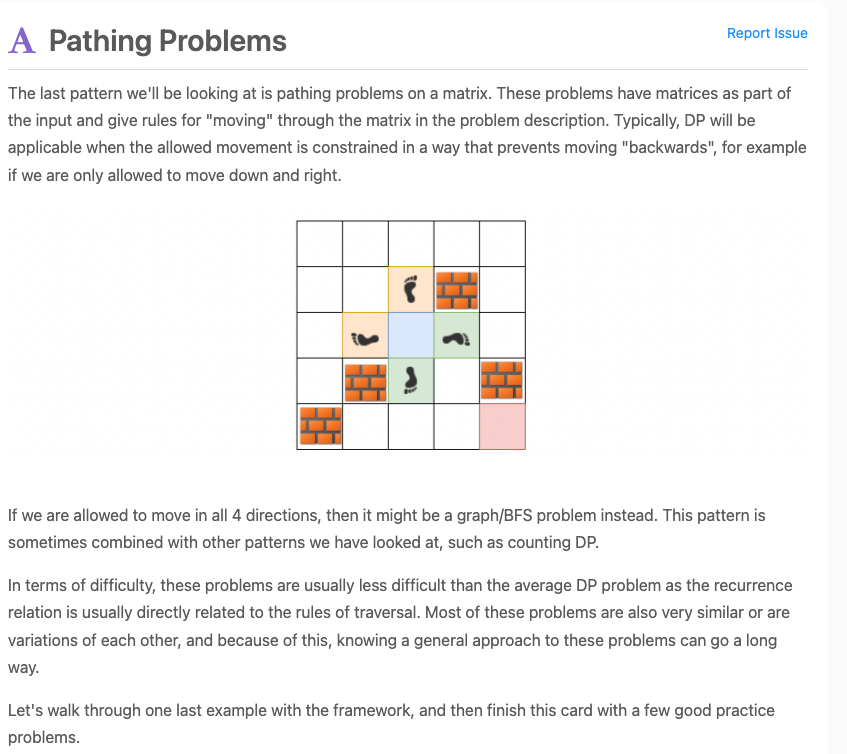

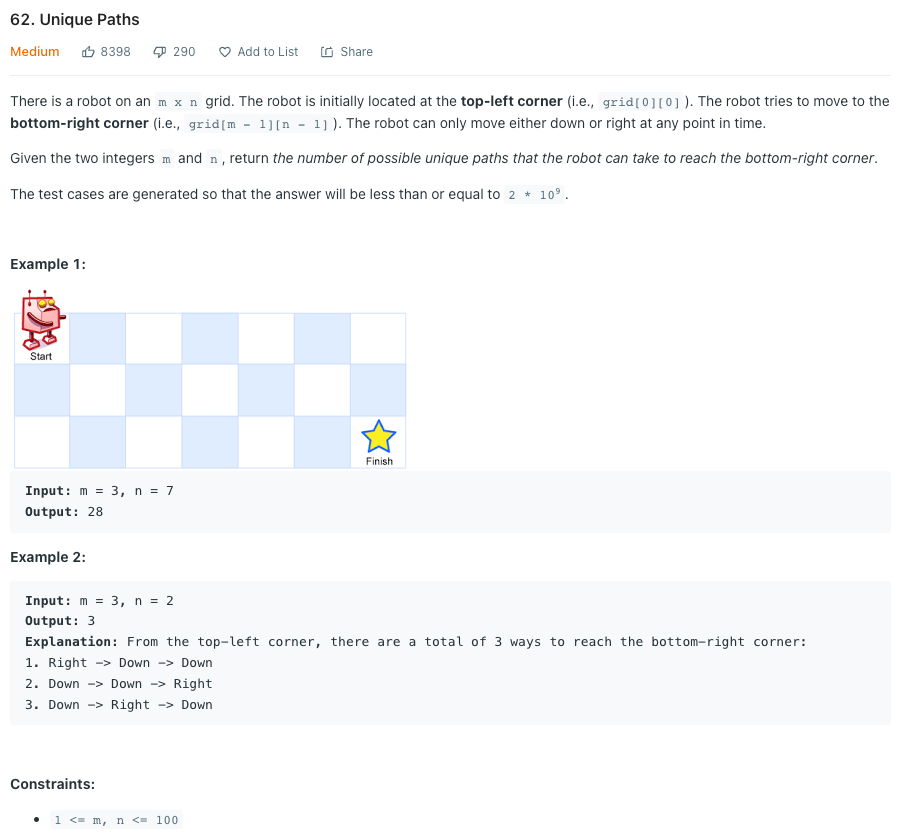

In [ ]:
# Accepted
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        
        @lru_cache(None)
        def dp(m,n):
            if m==1 or n==1:
                return 1
            elif m<1 or n<1:
                return 0
            else:
                return dp(m-1,n) + dp(m,n-1)
            
        return dp(m,n)

In [ ]:
# Standard
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        d = [[1] * n for _ in range(m)]

        for col in range(1, m):
            for row in range(1, n):
                d[col][row] = d[col - 1][row] + d[col][row - 1]

        return d[m - 1][n - 1]

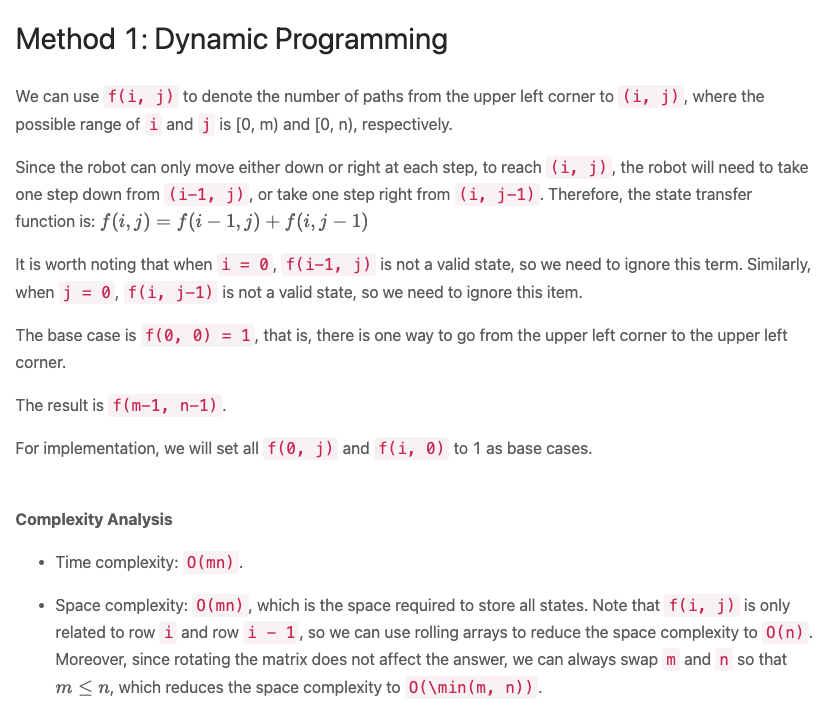

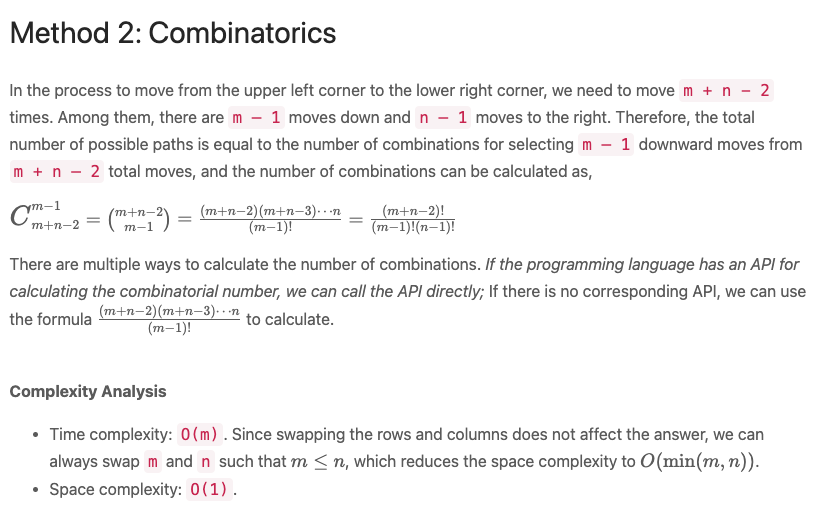

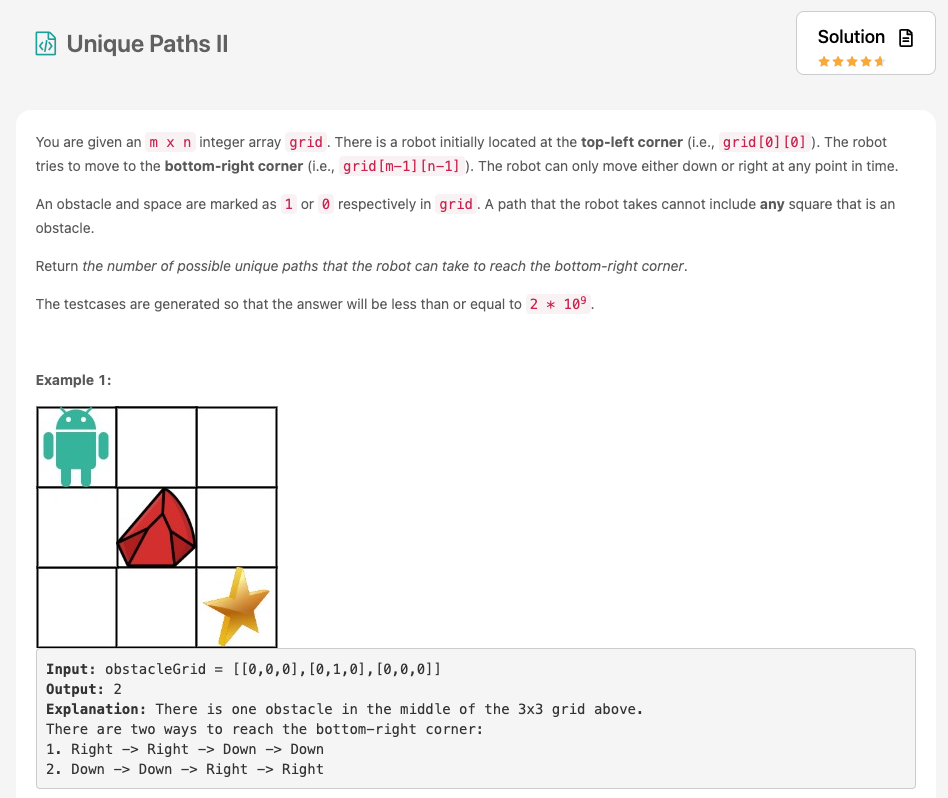

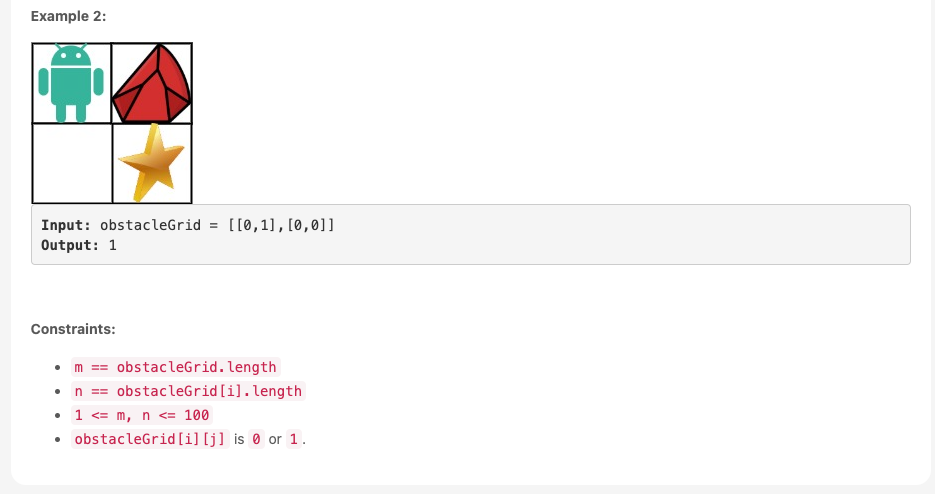

In [1]:
a = [[1,2,3],[4,5,6],[9,10,11]]

In [2]:
a[:,1:]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Failed v1
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        @lru_cache(None)
        def dp(grid):
            if len(grid)<1:
                return 0
                
            if len(grid)==1:
                if len(grid[0])<=2:
                    return 1
                else:
                    if not grid[0]:
                        return 0
                    
                    
                    if grid[0][1]==1:
                        return 0
                    else:
                        return dp(tuple(tuple(x[1:]) for x in grid))

            elif len(grid)<1 or len(grid[0])<1:
                return 0
            else:
                part1 = 0
                if grid[1][0]!=1:
                    part1 = dp(tuple(tuple(x) for x in grid[1:]))
                part2 = 0
                
                if grid[0][1]!=1:
                    part2 = dp(tuple(tuple(x[1:]) for x in grid))
                
                return part1 + part2
            
        return dp(tuple(tuple(x) for x in obstacleGrid))

In [ ]:
# Accepted
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        @lru_cache(None)
        def dp(m,n):
            if obstacleGrid[m][n]==1:
                return 0
            elif m==len(obstacleGrid)-1 and n==len(obstacleGrid[m])-1:
                return 1
            elif m>=len(obstacleGrid) or n>=len(obstacleGrid[m]):
                return 0   
            
            elif m==len(obstacleGrid)-1:
                if obstacleGrid[m][n+1]==1:
                    return 0
                else:
                    return dp(m,n+1)
            elif n==len(obstacleGrid[m])-1:
                if obstacleGrid[m+1][n]==1:
                    return 0
                else:
                    return dp(m+1,n)
            else:
                if obstacleGrid[m][n+1]==1 and obstacleGrid[m+1][n]==1:
                    return 0
                elif obstacleGrid[m][n+1]==1:
                    return dp(m+1,n)
                elif obstacleGrid[m+1][n]==1:
                    return dp(m,n+1)
                else:
                    return dp(m+1,n) + dp(m,n+1)
            
        return dp(0,0)


In [ ]:
# Standard
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """

        m = len(obstacleGrid)
        n = len(obstacleGrid[0])

        # If the starting cell has an obstacle, then simply return as there would be
        # no paths to the destination.
        if obstacleGrid[0][0] == 1:
            return 0

        # Number of ways of reaching the starting cell = 1.
        obstacleGrid[0][0] = 1

        # Filling the values for the first column
        for i in range(1,m):
            obstacleGrid[i][0] = int(obstacleGrid[i][0] == 0 and obstacleGrid[i-1][0] == 1)

        # Filling the values for the first row        
        for j in range(1, n):
            obstacleGrid[0][j] = int(obstacleGrid[0][j] == 0 and obstacleGrid[0][j-1] == 1)

        # Starting from cell(1,1) fill up the values
        # No. of ways of reaching cell[i][j] = cell[i - 1][j] + cell[i][j - 1]
        # i.e. From above and left.
        for i in range(1,m):
            for j in range(1,n):
                if obstacleGrid[i][j] == 0:
                    obstacleGrid[i][j] = obstacleGrid[i-1][j] + obstacleGrid[i][j-1]
                else:
                    obstacleGrid[i][j] = 0

        # Return value stored in rightmost bottommost cell. That is the destination.            
        return obstacleGrid[m-1][n-1]

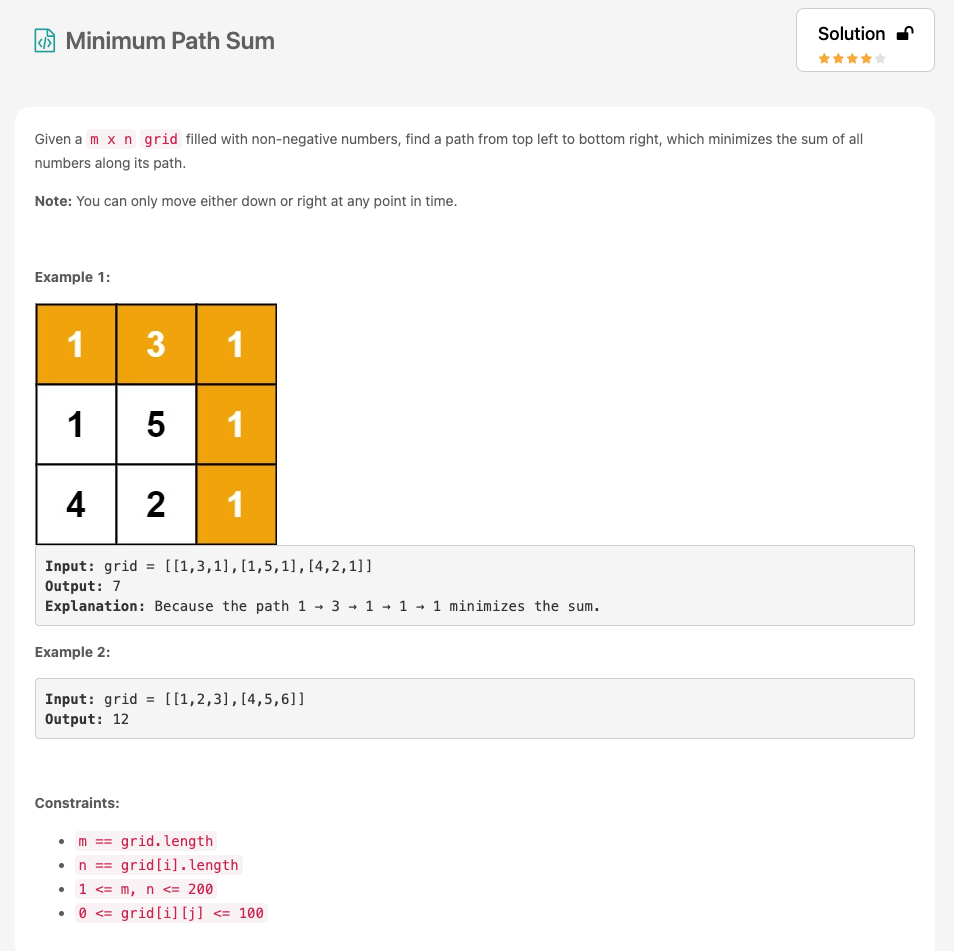

In [ ]:
# Accepted
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:

        @lru_cache(None)
        def dp(m,n):
            if m==len(grid)-1 and n==len(grid[m])-1:
                return grid[m][n]
            elif m>=len(grid) or n>=len(grid[m]):
                return float("inf")
            else:
                return min(dp(m+1,n)+grid[m][n],dp(m,n+1)+grid[m][n])
            
        return dp(0,0)

In [ ]:
# Approach 3: Dynamic Programming 1D
public class Solution {
    public int minPathSum(int[][] grid) {
        int[] dp = new int[grid[0].length];
        for (int i = grid.length - 1; i >= 0; i--) {
            for (int j = grid[0].length - 1; j >= 0; j--) {
                if(i == grid.length - 1 && j != grid[0].length - 1)
                    dp[j] = grid[i][j] +  dp[j + 1];
                else if(j == grid[0].length - 1 && i != grid.length - 1)
                    dp[j] = grid[i][j] + dp[j];
                else if(j != grid[0].length - 1 && i != grid.length - 1)
                    dp[j] = grid[i][j] + Math.min(dp[j], dp[j + 1]);
                else
                    dp[j] = grid[i][j];
            }
        }
        return dp[0];
    }
}
 

In [ ]:
# Approach 4: Dynamic Programming (Without Extra Space)
public class Solution {
    public int minPathSum(int[][] grid) {
        for (int i = grid.length - 1; i >= 0; i--) {
            for (int j = grid[0].length - 1; j >= 0; j--) {
                if(i == grid.length - 1 && j != grid[0].length - 1)
                    grid[i][j] = grid[i][j] +  grid[i][j + 1];
                else if(j == grid[0].length - 1 && i != grid.length - 1)
                    grid[i][j] = grid[i][j] + grid[i + 1][j];
                else if(j != grid[0].length - 1 && i != grid.length - 1)
                    grid[i][j] = grid[i][j] + Math.min(grid[i + 1][j],grid[i][j + 1]);
            }
        }
        return grid[0][0];
    }
}

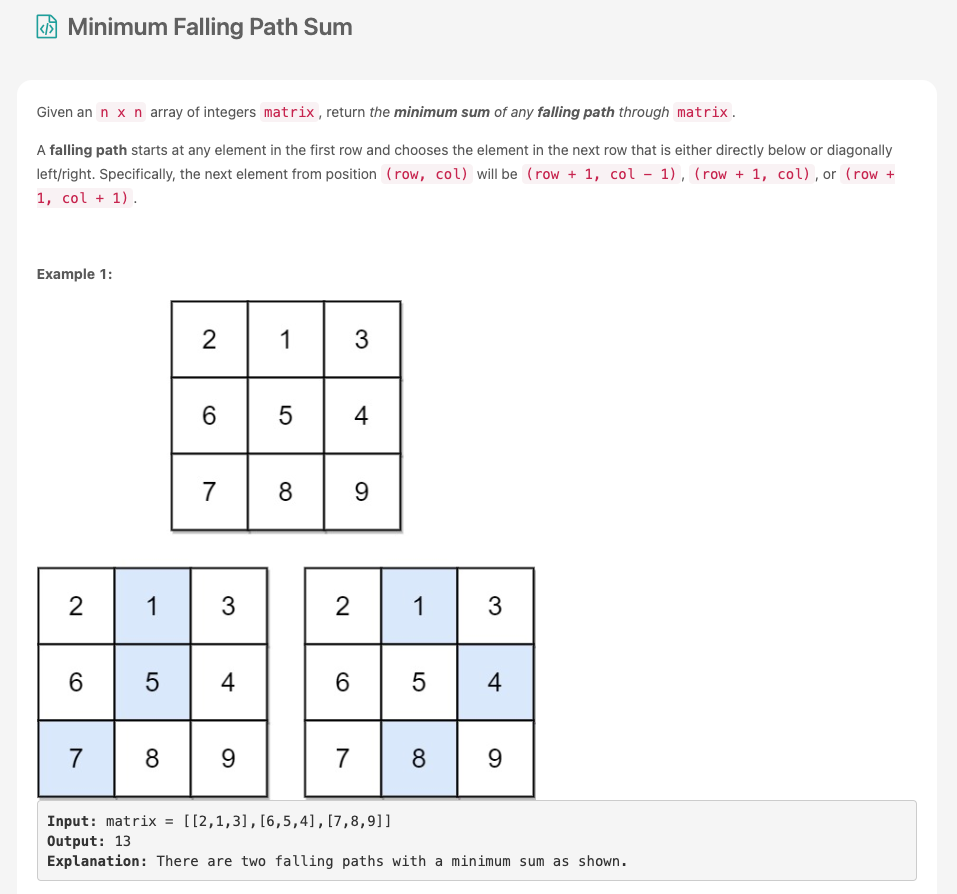

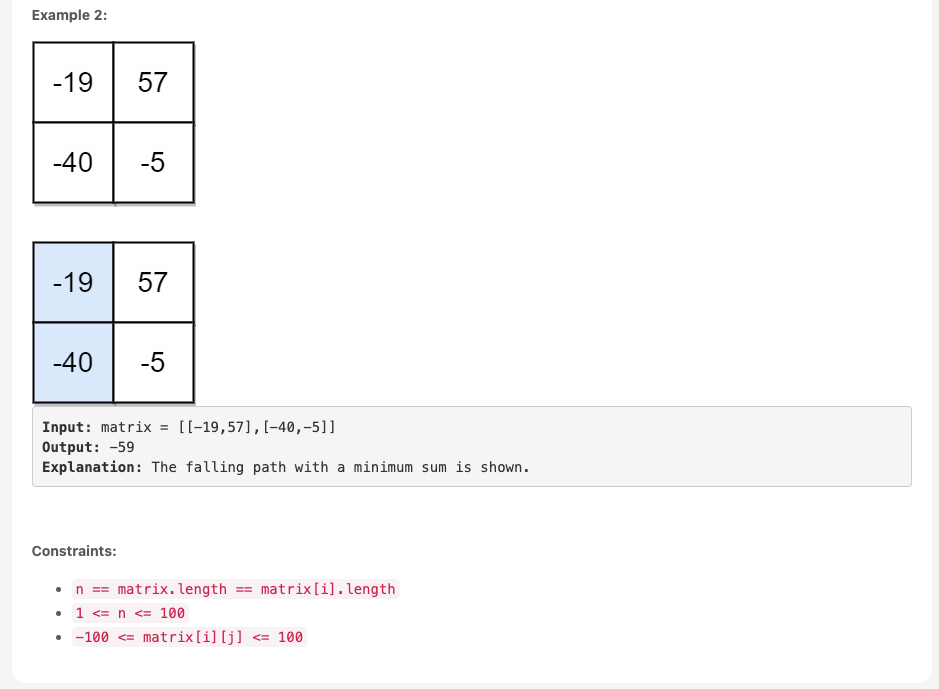

In [ ]:
# Accepted
class Solution:
    def minFallingPathSum(self, matrix: List[List[int]]) -> int:
        @lru_cache(None)
        def dp(m,n):

            if m>=len(matrix) or n>=len(matrix[m]):
                return float("inf")
            
            elif m==len(matrix)-1:
                return matrix[m][n] 
            
            elif m==len(matrix)-2:
                left = float('inf')
                right = float('inf')
                left = matrix[m+1][n-1] if n-1>=0 and n-1<len(matrix[m+1]) else float('inf')
                middle = matrix[m+1][n] if n>=0 and n<len(matrix[m+1]) else float('inf')
                right = matrix[m+1][n+1] if n+1>=0 and n+1<len(matrix[m+1]) else float('inf')
                
                # print(m,n)
                return min(left+matrix[m][n], middle+matrix[m][n], right+matrix[m][n])
    
            else:
                return min(dp(m+1,n-1)+matrix[m][n], 
                           dp(m+1,n)+matrix[m][n],
                           dp(m+1,n+1)+matrix[m][n])
            
        if not matrix:
            return 0
            
        all_result = []
        for i in range(len(matrix[0])):
            all_result.append(dp(0,i))
        print(all_result)
        return min(all_result)